In [44]:
import numpy as np
import math
from scipy.optimize import linear_sum_assignment
from scipy.optimize import minimize_scalar
from sklearn.utils import check_array
from sklearn.utils import column_or_1d
from skp import SinkhornKnopp  # .
from joblib import Parallel, delayed

In [1]:
from par_gmp_try import GraphMatch

In [45]:
from graspy.plot import heatmap
from graspy.simulations import er_corr, sbm, sbm_corr
import random
import timeit
from graspy.match import GraphMatch as GMP

In [46]:
np.random.seed(8888)
directed = False
loops = False
n_per_block = 5
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.5
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

In [5]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [6]:
n_init = 2
start = timeit.default_timer()
np.random.seed(12345)
sgm_par = GraphMatch(n_init=n_init, init_method="rand")
sgm_par = sgm_par.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)


print(f"{timeit.default_timer() - start} elapsed for parallel")
print("Match Ratio (parallel) ", match_ratio)
print("Optimal objective (parallel) ", sgm_par.score_)

[14  7  4 13 10  1 12  3  0 11  9  8  6  2  5]
64.0
1.4452354130007734 elapsed for parallel
Match Ratio (parallel)  0.06666666666666665
Optimal objective (parallel)  64.0


In [11]:
for i in range(10):
    currtime = timeit.default_timer()
    n_init = 2 
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle)

    t=timeit.default_timer() - currtime
    #print("time for n_init =%d is %0.4f" % (i, t))

[13  3  5  8 12  9 10  6 11  0 14  4  7  1  2]
62.0
[12  6  0 13  8  4  5  9  7  3 14 11  1 10  2]
66.0
[ 1  8 11  4 10  6  2 12  5  0 13 14  7  9  3]
64.0
[10 11  2  6  1  8  7  0 12  4  5  9 13  3 14]
62.0
[ 9  6  8  7 12  2 10 11 14  5  0  3  4  1 13]
64.0
[ 9  1  2  0  6 12 14  3  7  4 11  8 13 10  5]
62.0
[ 6  9 13  0 12  1  5 11  2 14  3  4  7 10  8]
68.0
[13  9  6 11 10  3 14  2  7  5 12  4  0  1  8]
66.0
[ 5  9  3 12 13 11  6  7  0  4  1  8  2 10 14]
66.0
[ 5  2 14 11 10  8 12  9  0 13  3  4  7  6  1]
64.0


### running time comparison

In [47]:
from par_gmp import GraphMatch
from graspy.match import GraphMatch as GMP

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
np.random.seed(8888)
directed = False
loops = False
n_per_block = 50
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.5
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

In [50]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [15]:
store_t=[]
store_m=[]
for i in range(20,210,20):
    currtime = timeit.default_timer()
    n_init = i  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle)
    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    store_t.append(t)
    store_m.append(match_ratio)
    print("time for n_init =%d is %0.4f, match ratio is %0.4f" % (i, t, match_ratio))

time for n_init =20 is 9.4088, match ratio is 0.0133
time for n_init =40 is 18.4686, match ratio is 0.0133
time for n_init =60 is 37.9579, match ratio is 0.0267
time for n_init =80 is 49.2554, match ratio is 0.0000
time for n_init =100 is 54.2173, match ratio is 0.0133
time for n_init =120 is 61.3504, match ratio is 0.0200
time for n_init =140 is 73.4506, match ratio is 0.0200
time for n_init =160 is 79.9626, match ratio is 0.0000
time for n_init =180 is 92.8591, match ratio is 0.0133
time for n_init =200 is 93.2057, match ratio is 0.1067


In [17]:
print(store_t)
print(store_m)

[9.408752024999558, 18.468605367001146, 37.95792290299869, 49.25542443999802, 54.21728173900192, 61.35040051299802, 73.45063608299824, 79.96255038800155, 92.85914644999866, 93.20574940900042]
[0.013333333333333308, 0.013333333333333308, 0.026666666666666616, 0.0, 0.013333333333333308, 0.020000000000000018, 0.020000000000000018, 0.0, 0.013333333333333308, 0.10666666666666669]


In [18]:
store_t_par=[]
store_m_par=[]
for i in range(20,210,20):
    currtime = timeit.default_timer()
    n_init = i  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    store_t_par.append(t)
    store_m_par.append(match_ratio)
    print("time for n_init =%d is %0.4f, match ratio is %0.4f" % (i, t, match_ratio))

time for n_init =20 is 5.9178, match ratio is 0.0200
time for n_init =40 is 11.0827, match ratio is 0.0133
time for n_init =60 is 16.0709, match ratio is 0.0067
time for n_init =80 is 21.2235, match ratio is 0.0133
time for n_init =100 is 27.6615, match ratio is 0.0000
time for n_init =120 is 31.6000, match ratio is 0.0133
time for n_init =140 is 37.6605, match ratio is 0.0133
time for n_init =160 is 40.5670, match ratio is 0.0067
time for n_init =180 is 49.3458, match ratio is 0.0133
time for n_init =200 is 51.7055, match ratio is 0.0000


In [19]:
print(store_t_par)
print(store_m_par)

[5.9177659199995105, 11.082681815998512, 16.07093954100128, 21.22351840400006, 27.661472797997703, 31.600027808999585, 37.66054394299863, 40.56697511099992, 49.345780060000834, 51.705482227000175]
[0.020000000000000018, 0.013333333333333308, 0.00666666666666671, 0.013333333333333308, 0.0, 0.013333333333333308, 0.013333333333333308, 0.00666666666666671, 0.013333333333333308, 0.0]


Text(0.5, 1.0, 'comparison of running time between serial & parallel GM(no seeds)')

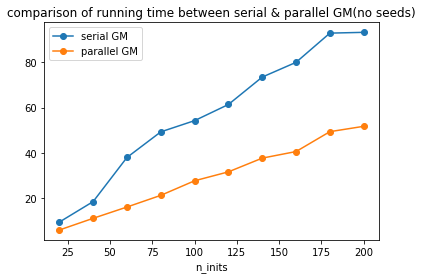

In [22]:
x=np.linspace(20,200,10)
plt.plot(x,store_t,'o-')
plt.plot(x,store_t_par,'o-')

plt.xlabel('n_inits')
plt.legend(['serial GM','parallel GM'])
plt.title('comparison of running time between serial & parallel GM(no seeds)')

### adding some seeds

In [23]:
W1 = np.sort(random.sample(list(range(n_verts)),10))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [24]:
seed_t_par1=[]
seed_m_par1=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 10  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par1.append(t)
    seed_m_par1.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0000, running time is 4.1940
match ratio for seed = 1 is 0.0600, running time is 3.6343
match ratio for seed = 2 is 0.0333, running time is 3.8234
match ratio for seed = 3 is 0.0667, running time is 3.8729
match ratio for seed = 4 is 0.0533, running time is 3.6540
match ratio for seed = 5 is 0.0667, running time is 3.6697
match ratio for seed = 6 is 0.3333, running time is 3.0787
match ratio for seed = 7 is 1.0000, running time is 3.0950
match ratio for seed = 8 is 1.0000, running time is 2.9751
match ratio for seed = 9 is 1.0000, running time is 2.9235


In [25]:
print(seed_t_par1)
print(seed_m_par1)

[4.194029923000926, 3.6343116620009823, 3.823388189997786, 3.872921286998462, 3.6539948509998794, 3.6696965739974985, 3.0786629050016927, 3.0950267810003425, 2.9751116459992772, 2.923487144998944]
[0.0, 0.06000000000000005, 0.033333333333333326, 0.06666666666666665, 0.053333333333333344, 0.06666666666666665, 0.33333333333333337, 1.0, 1.0, 1.0]


In [26]:
seed_t_par5=[]
seed_m_par5=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 50  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par5.append(t)
    seed_m_par5.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0000, running time is 13.7064
match ratio for seed = 1 is 0.0333, running time is 13.6879
match ratio for seed = 2 is 0.0200, running time is 12.6169
match ratio for seed = 3 is 0.0400, running time is 12.5098
match ratio for seed = 4 is 0.0600, running time is 12.3324
match ratio for seed = 5 is 0.0400, running time is 12.0978
match ratio for seed = 6 is 0.1333, running time is 11.1590
match ratio for seed = 7 is 1.0000, running time is 12.0925
match ratio for seed = 8 is 1.0000, running time is 9.6912
match ratio for seed = 9 is 1.0000, running time is 9.2449


In [27]:
print(seed_t_par5)
print(seed_m_par5)

[13.706414898999356, 13.687877890999516, 12.616905089998909, 12.509843424999417, 12.332401501000277, 12.097776841001178, 11.158990134001215, 12.092454658999486, 9.691175124000438, 9.244932810001046]
[0.0, 0.033333333333333326, 0.020000000000000018, 0.040000000000000036, 0.06000000000000005, 0.040000000000000036, 0.1333333333333333, 1.0, 1.0, 1.0]


In [35]:
seed_t_par1_o=[]
seed_m_par1_o=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 10  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par1_o.append(t)
    seed_m_par1_o.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0000, running time is 4.3551
match ratio for seed = 1 is 0.0533, running time is 4.4602
match ratio for seed = 2 is 0.0267, running time is 3.8722
match ratio for seed = 3 is 0.0667, running time is 4.8530
match ratio for seed = 4 is 1.0000, running time is 4.2529
match ratio for seed = 5 is 1.0000, running time is 4.2512
match ratio for seed = 6 is 1.0000, running time is 3.2876
match ratio for seed = 7 is 1.0000, running time is 3.1711
match ratio for seed = 8 is 1.0000, running time is 2.8720
match ratio for seed = 9 is 1.0000, running time is 3.1010


In [36]:
seed_t_par5_o=[]
seed_m_par5_o=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 50  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par5_o.append(t)
    seed_m_par5_o.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0133, running time is 25.1907
match ratio for seed = 1 is 0.0400, running time is 26.1042
match ratio for seed = 2 is 0.0867, running time is 21.5805
match ratio for seed = 3 is 0.1600, running time is 21.2146
match ratio for seed = 4 is 0.1267, running time is 23.3782
match ratio for seed = 5 is 1.0000, running time is 20.2032
match ratio for seed = 6 is 1.0000, running time is 15.6721
match ratio for seed = 7 is 1.0000, running time is 16.1011
match ratio for seed = 8 is 1.0000, running time is 14.5504
match ratio for seed = 9 is 1.0000, running time is 15.8005


In [42]:
print(seed_t_par1_o)
print(seed_m_par1_o)
print(seed_t_par5_o)
print(seed_m_par5_o)

[4.355125123001926, 4.46020919700095, 3.8721628970015445, 4.853036710999731, 4.252854653997929, 4.251155376005045, 3.2875908339992748, 3.1710910990004777, 2.8719774300043355, 3.1009502240049187]
[0.0, 0.053333333333333344, 0.026666666666666616, 0.06666666666666665, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[25.19072588999552, 26.104247765004402, 21.580519554998318, 21.21464704900427, 23.37823699800356, 20.203240821996587, 15.672061696001037, 16.101093735000177, 14.55035702099849, 15.800523026002338]
[0.013333333333333308, 0.040000000000000036, 0.08666666666666667, 0.16000000000000003, 0.1266666666666667, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'match ratio comparison of serial & parallel GM')

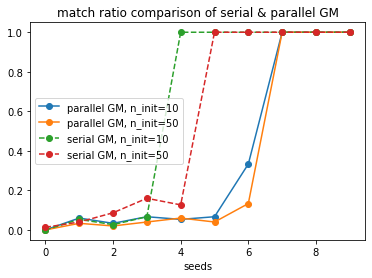

In [39]:
x=np.linspace(0,9,10)
plt.plot(x,seed_m_par1,'o-')
plt.plot(x,seed_m_par5,'o-')

plt.plot(x,seed_m_par1_o,'o--')
plt.plot(x,seed_m_par5_o,'o--')

plt.xlabel('seeds')
plt.legend(['parallel GM, n_init=10','parallel GM, n_init=50','serial GM, n_init=10','serial GM, n_init=50'])
plt.title('match ratio comparison of serial & parallel GM')

### running time comparison

Text(0.5, 1.0, 'running time comparison of serial & parallel GM')

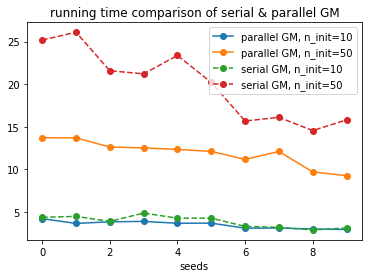

In [43]:
x=np.linspace(0,9,10)
plt.plot(x,seed_t_par1,'o-')
plt.plot(x,seed_t_par5,'o-')

plt.plot(x,seed_t_par1_o,'o--')
plt.plot(x,seed_t_par5_o,'o--')

plt.xlabel('seeds')
plt.legend(['parallel GM, n_init=10','parallel GM, n_init=50','serial GM, n_init=10','serial GM, n_init=50'])
plt.title('running time comparison of serial & parallel GM')

In [51]:
seed_t_par10=[]
seed_m_par10=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 100  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par10.append(t)
    seed_m_par10.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0000, running time is 26.5148
match ratio for seed = 1 is 0.0533, running time is 27.2032
match ratio for seed = 2 is 0.0333, running time is 37.6838
match ratio for seed = 3 is 0.0200, running time is 32.0892
match ratio for seed = 4 is 0.0667, running time is 28.0140
match ratio for seed = 5 is 0.0800, running time is 27.8318
match ratio for seed = 6 is 0.0733, running time is 24.8460
match ratio for seed = 7 is 0.1333, running time is 22.2623
match ratio for seed = 8 is 1.0000, running time is 18.6948
match ratio for seed = 9 is 1.0000, running time is 18.0846


In [52]:
print(seed_t_par10)
print(seed_m_par10)

[26.514802047997364, 27.203225885008578, 37.683822716004215, 32.089154105007765, 28.013967797000078, 27.831777053012047, 24.845962331994087, 22.262250252999365, 18.694763369989232, 18.084635592007544]
[0.0, 0.053333333333333344, 0.033333333333333326, 0.020000000000000018, 0.06666666666666665, 0.07999999999999996, 0.07333333333333336, 0.1333333333333333, 1.0, 1.0]


In [53]:
seed_t_par10_o=[]
seed_m_par10_o=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = timeit.default_timer()
    n_init = 100  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=timeit.default_timer() - currtime
    seed_t_par10_o.append(t)
    seed_m_par10_o.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0067, running time is 48.8025
match ratio for seed = 1 is 0.0533, running time is 51.5916
match ratio for seed = 2 is 0.1467, running time is 49.7593
match ratio for seed = 3 is 1.0000, running time is 44.5980
match ratio for seed = 4 is 1.0000, running time is 38.9337
match ratio for seed = 5 is 1.0000, running time is 36.5147
match ratio for seed = 6 is 1.0000, running time is 35.8074
match ratio for seed = 7 is 1.0000, running time is 27.5455
match ratio for seed = 8 is 1.0000, running time is 27.8040
match ratio for seed = 9 is 1.0000, running time is 25.1653


In [54]:
print(seed_t_par10_o)
print(seed_m_par10_o)

[48.80251827900065, 51.59162765699148, 49.75928151499829, 44.59804823799641, 38.93366988300113, 36.51469151099445, 35.80738194900914, 27.545536618999904, 27.80400203500176, 25.165340031991946]
[0.00666666666666671, 0.053333333333333344, 0.1466666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'match ratio comparison of serial & parallel GM')

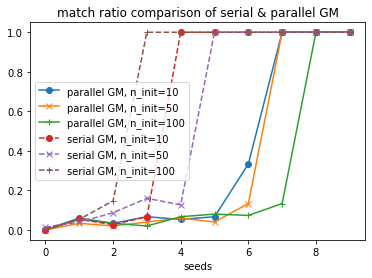

In [62]:
x=np.linspace(0,9,10)
plt.plot(x,seed_m_par1,'o-')
plt.plot(x,seed_m_par5,'x-')
plt.plot(x,seed_m_par10,'+-')

plt.plot(x,seed_m_par1_o,'o--')
plt.plot(x,seed_m_par5_o,'x--')
plt.plot(x,seed_m_par10_o,'+--')

plt.xlabel('seeds')
plt.legend(['parallel GM, n_init=10','parallel GM, n_init=50','parallel GM, n_init=100','serial GM, n_init=10','serial GM, n_init=50','serial GM, n_init=100'])
plt.title('match ratio comparison of serial & parallel GM')

Text(0.5, 1.0, 'running time comparison of serial & parallel GM')

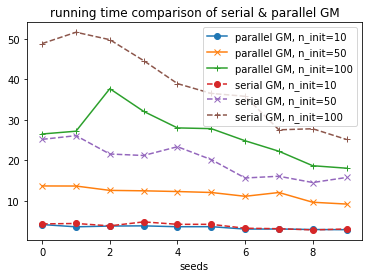

In [61]:
x=np.linspace(0,9,10)
plt.plot(x,seed_t_par1,'o-')
plt.plot(x,seed_t_par5,'x-')
plt.plot(x,seed_t_par10,'+-')

plt.plot(x,seed_t_par1_o,'o--')
plt.plot(x,seed_t_par5_o,'x--')
plt.plot(x,seed_t_par10_o,'+--')

plt.xlabel('seeds')
plt.legend(['parallel GM, n_init=10','parallel GM, n_init=50','parallel GM, n_init=100','serial GM, n_init=10','serial GM, n_init=50','serial GM, n_init=100'])
plt.title('running time comparison of serial & parallel GM')